# Redes neuronales clasificadoras con pyTorch.

Los problemas de clasficación son aquellos que identifican según determinadas caraterísticas o atributos determinadas cosas, situaciones, entre otros elementos las entradas en diferentes tipos de salida.
Por ejemplo: perros o gatos, hombre o mujer, spam o no, entre otros. Llamaremos a estos *clasificación binaria*.

También podrémos clasificar las entradas en más de dos salidas, por ejemplo: ¿es una hamburguesa, unas pastas o una pizza? Llamaremos a esto *clasificación multiclase*.

<center><img src="img/redes_neuronales_clasificadoras.png" width="700"></center>

Para este ejemplo las imagenes son separadas por pixeles y analizadas por una red neuronal, la cual atráves de diferentes estrategias matemáticas "aprenderá", en realidad no aprenderá, son la magia comprensible de las matemáticas junto a la rapidez de una computadora las que están detrás de estas maravillas.

Para trabajar con redes neuronales debemos obligatoriamente tener un set de datos a mano de un tamaño considerable. Independientemente de la subjetividad detras de "tamaño considerable" stklearn tiene consigo mismo datasets que podrémos importar y utilizar.

In [1]:
# Importamos dataset y librerias

import torch
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import make_circles

In [2]:
n_samples = 1000

X, y = make_circles(n_samples, 
                    noise=0.03,
                    random_state=42)

In [3]:
len(X), len(y)

(1000, 1000)

In [4]:
print(f"Primeros ejemplares del data set X: \n {X[:5]}")
print(f"Primeros ejemplares del data set Y: \n {y[:5]}")

Primeros ejemplares del data set X: 
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
Primeros ejemplares del data set Y: 
 [1 1 1 1 0]


# Sobre el dataset

El set de datos nos mostrará puntos distribuidos en forma de circulos:

*X:* Matriz de forma (n_samples, 2), con las coordenadas x e y de cada punto.

*y:* Vector de etiquetas (0 o 1) que indica a qué círculo pertenece cada punto.

In [5]:
# Llevo el set de datos a un dataframe para ver los primeros elementos del dataset de manera ordenada y a gusto:

circulos = pd.DataFrame({"X1": X[:, 0]
                         , "X2": X[:, 1]
                         , "label": y})

circulos.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


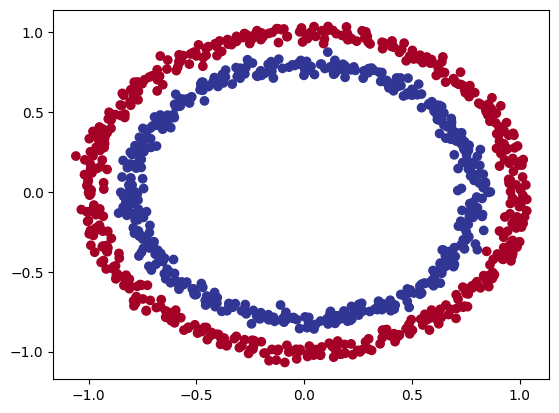

In [6]:
# Visualizamos todos los datos del set de datos:

plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c=y,
            cmap=plt.cm.RdYlBu)


# Siempre llevar los datasets a tensores

Recordemos que para realizar modelos con pyTorch nuestros datos deberán ser tratados como tensores, por lo que si estos están en otro formato habrá que valernos de las funciones que nos proporciona para llevarlo a esta estructura.

In [7]:
type(X), X.dtype

(numpy.ndarray, dtype('float64'))

In [8]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X[:5], y[:5]


(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [9]:
# Para dividir el set de datos en los de prueba y testeo nos valdrémos de la libreria sklearn

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2, # 20% para datos de testeo
                                                    random_state=42)

In [10]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

In [11]:
X_train.shape

torch.Size([800, 2])

# Construyendo una red neuronal

Ya tenemos nuestros datos como tensores, ahora necesitamos construir nuestra red neuronal.

Para eso debemos:
1. Instanciar el CPU a utilizar. (Esto lo viene diciendo hace rato y lo omití completamente)
2. Construir el modelo en una subclase de nn.Module.
3. Instanciar la función de perdida y optimización.
4. Crear el ciclo de entrenamiento y prueba.

Bajando más a detalle en nuestro modelo debemos:
1. Crear una subclase de nn.Module
2. Crearemos 2 *nn.Linear()* que serán capas ocultas, estas neuronas tendrán una función de activación lineal: **x=y**.
3. Definiremos nuevamente *forward* 
4. Instanciaremos el modelo en cuestión y lo probaremos.

In [12]:
from torch import nn

# Creamos la clase con su constructor
class CircleModulLinealV0(nn.Module):
    def __init__(self):
        super().__init__()
        # Creamos las capas ocultas
        self.capa_1 = nn.Linear(in_features=2, out_features=5) # La función de activación será lineal.
        self.capa_2 = nn.Linear(in_features=5, out_features=1) # in_features deberá coincidir con out_features de la capa anterior

    # Definiremos nuevamente forward
    def forward(self, x):
        return self.capa_2(self.capa_1(x)) # x -> capa_1 -> capa_2 -> salida


# Instaciamos la clase en cuestión

red_lineal = CircleModulLinealV0()
red_lineal

CircleModulLinealV0(
  (capa_1): Linear(in_features=2, out_features=5, bias=True)
  (capa_2): Linear(in_features=5, out_features=1, bias=True)
)

In [13]:
class CircleModulSequential(nn.Module):
    def __init__(self):
        super().__init__()
        self.dos_capas_lineales = nn.Sequential(
            nn.Linear(in_features=2, out_features=5),
            nn.Linear(in_features=5, out_features=1)
        )

    def forward(self, x):
        return dos_capas_lineales(x)

red_sequential = CircleModulSequential()
red_sequential
# red_sequential.state_dict() nos mostrará toda la matemática manualmente que nos ahorramos al realizar nuestros modelos

CircleModulSequential(
  (dos_capas_lineales): Sequential(
    (0): Linear(in_features=2, out_features=5, bias=True)
    (1): Linear(in_features=5, out_features=1, bias=True)
  )
)

In [14]:
# modelo_sin_entrenar = red_lineal(X_test)
# print(f"{len(modelo_sin_entrenar)} + Shape: {modelo_sin_entrenar.shape}")
# print(f"{len(X_test)} + Shape: {X_test.shape}")
# print(f"{modelo_sin_entrenar[:10]}")
# print(f"{y_test[:10]}")

# Función de activación, optimización y perdida

Según las caracterísitcas de nuestro problema la arquitectura de nuestra red neuronal deberá ser, preferiblemente, estructurada con determinadas funciones de perdida, activación y optimización.
Si bien estas propiedades no son estrictamente así lo cierto es que estan más que estudiadas y estas generalizaciones son mejor que simplemente probar una y otra vez, más teniendo en cuenta que el tamaño de estas es mucho mayor que estas de prueba.

<center><img src="img/activacion_y_perdida.png" width="600"></center>

No hay nada que resumir acá, saber que funciones utilizar será cuestión de practica (supongo) o de simplemente hacer caso y seguir una consigna en cuestión.


In [15]:
# Ejemplo

loss_fn = nn.BCEWithLogitsLoss() 
optimizer = torch.optim.SGD(params=red_lineal.parameters()
                            ,lr=0.1)

In [16]:
# Una vez tengamos declaradas la función de perdida y el optimzador podrémos ver su exactitud

def exactitud_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct/len(y_pred)) * 100
    return acc

# Entrenando el modelo

Ahora bien, debemos nuevamente realizar el ciclo de entrenamiento, prueba y validación: este proceso siempre es mecánico, según varias fuentes después de un tiempo ya es absurdamente mecánico y, si todo funciona bien, nos llevarémos un gran gusto al ver que nuestro modelo funciona correctamente. 

Dadas ciertas ambiguedades con mi traducción copiaré los pasos en ingles, aunque con entender el concepto alcanza considero que a fin de cuentas importa realizarlo bien y no quiero omitir ningun paso

1. *Foward pass*
2. *Calculate the loss*
3. *Optimizer zero grad*
4. *Loss backward (backpropagation)*
5. *Optimizer step (gradient descent)*

In [17]:
y_logits = red_lineal(X_test)[:5]
y_logits

tensor([[-0.4869],
        [-0.3899],
        [-0.3654],
        [-0.5228],
        [ 0.2308]], grad_fn=<SliceBackward0>)

In [18]:
# Utizemos la función sigmoide

y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.3806],
        [0.4037],
        [0.4096],
        [0.3722],
        [0.5575]], grad_fn=<SigmoidBackward0>)

In [19]:
torch.manual_seed(42)

# Set the number of epochs
epocas = 100

# Build training and evaluation loop
for epoca in range(epocas):
    ### Training
    red_lineal.train()

    # 1. Forward pass (model outputs raw logits)
    y_logits = red_lineal(X_train).squeeze() # squeeze to remove extra `1` dimensions, this won't work unless model and data are on same device 
    y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits -> pred probs -> pred labls
  
    # 2. Calculate loss/accuracy
    # loss = loss_fn(torch.sigmoid(y_logits), # Using nn.BCELoss you need torch.sigmoid()
    #                y_train) 
    loss = loss_fn(y_logits, # Using nn.BCEWithLogitsLoss works with raw logits
                   y_train) 
    acc = exactitud_fn(y_true=y_train, 
                      y_pred=y_pred) 

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    red_lineal.eval()
    with torch.inference_mode():
        # 1. Forward pass
        test_logits = red_lineal(X_test).squeeze() 
        test_pred = torch.round(torch.sigmoid(test_logits))
        # 2. Caculate loss/accuracy
        test_loss = loss_fn(test_logits,
                            y_test)
        test_acc = exactitud_fn(y_true=y_test,
                               y_pred=test_pred)

    # Print out what's happening every 10 epochs
    if epoca % 10 == 0:
        print(f"Epoch: {epoca} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.70943, Accuracy: 49.38% | Test loss: 0.70637, Test acc: 46.50%
Epoch: 10 | Loss: 0.70315, Accuracy: 50.38% | Test loss: 0.70054, Test acc: 46.00%
Epoch: 20 | Loss: 0.69980, Accuracy: 50.50% | Test loss: 0.69769, Test acc: 46.00%
Epoch: 30 | Loss: 0.69772, Accuracy: 50.00% | Test loss: 0.69612, Test acc: 47.00%
Epoch: 40 | Loss: 0.69633, Accuracy: 50.25% | Test loss: 0.69520, Test acc: 45.00%
Epoch: 50 | Loss: 0.69537, Accuracy: 50.50% | Test loss: 0.69465, Test acc: 46.50%
Epoch: 60 | Loss: 0.69469, Accuracy: 50.12% | Test loss: 0.69432, Test acc: 47.50%
Epoch: 70 | Loss: 0.69421, Accuracy: 50.25% | Test loss: 0.69413, Test acc: 48.50%
Epoch: 80 | Loss: 0.69386, Accuracy: 49.75% | Test loss: 0.69404, Test acc: 49.50%
Epoch: 90 | Loss: 0.69362, Accuracy: 49.88% | Test loss: 0.69400, Test acc: 51.50%


In [20]:
# Por alguna razón no puedo importar las funciones correspondientes, las voy a copiar manualmente pero no es lo esperado.
# import requests
# from pathlib import Path

#if Path("helper_functions.py").is_file():
#    print(f"helper_functions.py existe, no es necesaria su descarga.")
#else:
#    print(f"Descargando helper_functions.py ... ...")
#    requerimiento = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")
#    with open("helper_functions.py", "wb") as f:
#        f.write(requerimiento.content)

#from helper_functions import plot_predictions, plot_decision_boundary

In [21]:
"""
A series of helper functions used throughout the course.

If a function gets defined once and could be used over and over, it'll go in here.
"""
import torch
import matplotlib.pyplot as plt
import numpy as np

from torch import nn

import os
import zipfile

from pathlib import Path

import requests

# Walk through an image classification directory and find out how many files (images)
# are in each subdirectory.
import os

def walk_through_dir(dir_path):
    """
    Walks through dir_path returning its contents.
    Args:
    dir_path (str): target directory

    Returns:
    A print out of:
      number of subdiretories in dir_path
      number of images (files) in each subdirectory
      name of each subdirectory
    """
    for dirpath, dirnames, filenames in os.walk(dir_path):
        print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

def plot_decision_boundary(model: torch.nn.Module, X: torch.Tensor, y: torch.Tensor):
    """Plots decision boundaries of model predicting on X in comparison to y.

    Source - https://madewithml.com/courses/foundations/neural-networks/ (with modifications)
    """
    # Put everything to CPU (works better with NumPy + Matplotlib)
    model.to("cpu")
    X, y = X.to("cpu"), y.to("cpu")

    # Setup prediction boundaries and grid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101), np.linspace(y_min, y_max, 101))

    # Make features
    X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()

    # Make predictions
    model.eval()
    with torch.inference_mode():
        y_logits = model(X_to_pred_on)

    # Test for multi-class or binary and adjust logits to prediction labels
    if len(torch.unique(y)) > 2:
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)  # mutli-class
    else:
        y_pred = torch.round(torch.sigmoid(y_logits))  # binary

    # Reshape preds and plot
    y_pred = y_pred.reshape(xx.shape).detach().numpy()
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())


# Plot linear data or training and test and predictions (optional)
def plot_predictions(
    train_data, train_labels, test_data, test_labels, predictions=None
):
    """
  Plots linear training data and test data and compares predictions.
  """
    plt.figure(figsize=(10, 7))

    # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

    # Plot test data in green
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

    if predictions is not None:
        # Plot the predictions in red (predictions were made on the test data)
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

    # Show the legend
    plt.legend(prop={"size": 14})


# Calculate accuracy (a classification metric)
def accuracy_fn(y_true, y_pred):
    """Calculates accuracy between truth labels and predictions.

    Args:
        y_true (torch.Tensor): Truth labels for predictions.
        y_pred (torch.Tensor): Predictions to be compared to predictions.

    Returns:
        [torch.float]: Accuracy value between y_true and y_pred, e.g. 78.45
    """
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc


def print_train_time(start, end, device=None):
    """Prints difference between start and end time.

    Args:
        start (float): Start time of computation (preferred in timeit format). 
        end (float): End time of computation.
        device ([type], optional): Device that compute is running on. Defaults to None.

    Returns:
        float: time between start and end in seconds (higher is longer).
    """
    total_time = end - start
    print(f"\nTrain time on {device}: {total_time:.3f} seconds")
    return total_time


# Plot loss curves of a model
def plot_loss_curves(results):
    """Plots training curves of a results dictionary.

    Args:
        results (dict): dictionary containing list of values, e.g.
            {"train_loss": [...],
             "train_acc": [...],
             "test_loss": [...],
             "test_acc": [...]}
    """
    loss = results["train_loss"]
    test_loss = results["test_loss"]

    accuracy = results["train_acc"]
    test_accuracy = results["test_acc"]

    epochs = range(len(results["train_loss"]))

    plt.figure(figsize=(15, 7))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label="train_loss")
    plt.plot(epochs, test_loss, label="test_loss")
    plt.title("Loss")
    plt.xlabel("Epochs")
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label="train_accuracy")
    plt.plot(epochs, test_accuracy, label="test_accuracy")
    plt.title("Accuracy")
    plt.xlabel("Epochs")
    plt.legend()


# Pred and plot image function from notebook 04
# See creation: https://www.learnpytorch.io/04_pytorch_custom_datasets/#113-putting-custom-image-prediction-together-building-a-function
from typing import List
import torchvision


def pred_and_plot_image(
    model: torch.nn.Module,
    image_path: str,
    class_names: List[str] = None,
    transform=None,
    device: torch.device = "cuda" if torch.cuda.is_available() else "cpu",
):
    """Makes a prediction on a target image with a trained model and plots the image.

    Args:
        model (torch.nn.Module): trained PyTorch image classification model.
        image_path (str): filepath to target image.
        class_names (List[str], optional): different class names for target image. Defaults to None.
        transform (_type_, optional): transform of target image. Defaults to None.
        device (torch.device, optional): target device to compute on. Defaults to "cuda" if torch.cuda.is_available() else "cpu".
    
    Returns:
        Matplotlib plot of target image and model prediction as title.

    Example usage:
        pred_and_plot_image(model=model,
                            image="some_image.jpeg",
                            class_names=["class_1", "class_2", "class_3"],
                            transform=torchvision.transforms.ToTensor(),
                            device=device)
    """

    # 1. Load in image and convert the tensor values to float32
    target_image = torchvision.io.read_image(str(image_path)).type(torch.float32)

    # 2. Divide the image pixel values by 255 to get them between [0, 1]
    target_image = target_image / 255.0

    # 3. Transform if necessary
    if transform:
        target_image = transform(target_image)

    # 4. Make sure the model is on the target device
    model.to(device)

    # 5. Turn on model evaluation mode and inference mode
    model.eval()
    with torch.inference_mode():
        # Add an extra dimension to the image
        target_image = target_image.unsqueeze(dim=0)

        # Make a prediction on image with an extra dimension and send it to the target device
        target_image_pred = model(target_image.to(device))

    # 6. Convert logits -> prediction probabilities (using torch.softmax() for multi-class classification)
    target_image_pred_probs = torch.softmax(target_image_pred, dim=1)

    # 7. Convert prediction probabilities -> prediction labels
    target_image_pred_label = torch.argmax(target_image_pred_probs, dim=1)

    # 8. Plot the image alongside the prediction and prediction probability
    plt.imshow(
        target_image.squeeze().permute(1, 2, 0)
    )  # make sure it's the right size for matplotlib
    if class_names:
        title = f"Pred: {class_names[target_image_pred_label.cpu()]} | Prob: {target_image_pred_probs.max().cpu():.3f}"
    else:
        title = f"Pred: {target_image_pred_label} | Prob: {target_image_pred_probs.max().cpu():.3f}"
    plt.title(title)
    plt.axis(False)

def set_seeds(seed: int=42):
    """Sets random sets for torch operations.

    Args:
        seed (int, optional): Random seed to set. Defaults to 42.
    """
    # Set the seed for general torch operations
    torch.manual_seed(seed)
    # Set the seed for CUDA torch operations (ones that happen on the GPU)
    torch.cuda.manual_seed(seed)

def download_data(source: str, 
                  destination: str,
                  remove_source: bool = True) -> Path:
    """Downloads a zipped dataset from source and unzips to destination.

    Args:
        source (str): A link to a zipped file containing data.
        destination (str): A target directory to unzip data to.
        remove_source (bool): Whether to remove the source after downloading and extracting.
    
    Returns:
        pathlib.Path to downloaded data.
    
    Example usage:
        download_data(source="https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip",
                      destination="pizza_steak_sushi")
    """
    # Setup path to data folder
    data_path = Path("data/")
    image_path = data_path / destination

    # If the image folder doesn't exist, download it and prepare it... 
    if image_path.is_dir():
        print(f"[INFO] {image_path} directory exists, skipping download.")
    else:
        print(f"[INFO] Did not find {image_path} directory, creating one...")
        image_path.mkdir(parents=True, exist_ok=True)
        
        # Download pizza, steak, sushi data
        target_file = Path(source).name
        with open(data_path / target_file, "wb") as f:
            request = requests.get(source)
            print(f"[INFO] Downloading {target_file} from {source}...")
            f.write(request.content)

        # Unzip pizza, steak, sushi data
        with zipfile.ZipFile(data_path / target_file, "r") as zip_ref:
            print(f"[INFO] Unzipping {target_file} data...") 
            zip_ref.extractall(image_path)

        # Remove .zip file
        if remove_source:
            os.remove(data_path / target_file)
    
    return image_path


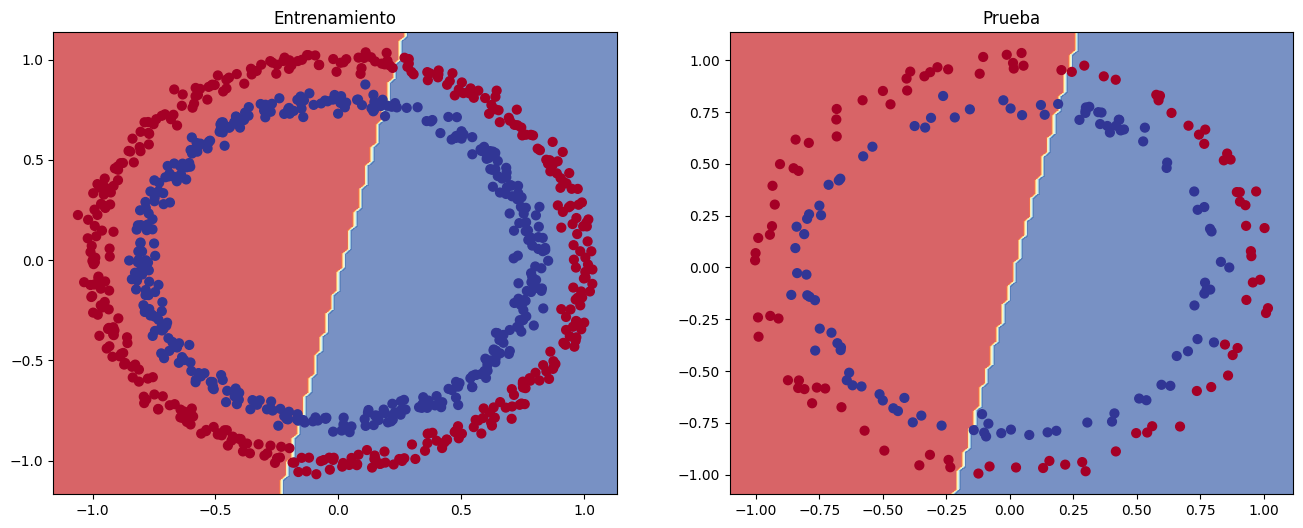

In [22]:
plt.figure(figsize=(16,6))
plt.subplot(1, 2, 1)
plt.title("Entrenamiento")
plot_decision_boundary(red_lineal, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Prueba") 
plot_decision_boundary(red_lineal, X_test, y_test)

# Mejorando nuestro modelo

Hasta ahora nuestro modelo deja mucho que desear, ¿puede ser mejorado? claramente sí.

1. Añadiremos más capas
2. Anadiremos más valores
3. Entrenar por más tiempo o epocas
4. Cambiarémos las funciones de activación
5. Cambiarémos el learning rate (lr, fue muy chico el asignado)

<center><img src="img/tensorboard.png" width="700"></center>

Para mejorar nuestro modelo debemos entonces:

<center><img src="img/mejorar_modelo.png" width="700"></center>

In [23]:
red_lineal.state_dict() # Estamos parados sobre este modelo

OrderedDict([('capa_1.weight',
              tensor([[ 0.2778,  0.3904],
                      [-0.6472, -0.2863],
                      [-0.6461,  0.3578],
                      [ 0.1549,  0.5504],
                      [ 0.4982, -0.6626]])),
             ('capa_1.bias',
              tensor([-0.6603,  0.6510,  0.3378, -0.3881,  0.3029])),
             ('capa_2.weight',
              tensor([[-0.3541, -0.1904, -0.1957,  0.0613, -0.1531]])),
             ('capa_2.bias', tensor([0.0245]))])

In [24]:
X_train[:5], y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

In [25]:
class CircleModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10) 
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        
    def forward(self, x):
        # z = self.layer_1(x)
        # z = self.layer_2(z)
        # z = self.layer_3(z)
        # return z
        return self.layer_3(self.layer_2(self.layer_1(x)))

model_1 = CircleModelV1()
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [26]:
# Función de perdida y optimizador nuevos 

loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)

In [27]:
torch.manual_seed(42)

epocas = 1000

for epoca in range(epocas):
    model_1.train()
    # 1. Forward pass
    y_logits = model_1(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))

    # 2. Perdida y exactitud

    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)
    
    # 3. Optimizador

    optimizer.zero_grad()

    # 4. Loss backward, backpropagation

    loss.backward()

    # 5. Optimizador, gradiente

    optimizer.step() 

    # Pruebas

    model_1.eval()
    with torch.inference_mode():
        # 1. Forward pass
        test_logits = model_1(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        # 2. Calcular la perdida
        test_loss = loss_fn(test_logits,
                            y_test)
        test_acc = accuracy_fn(y_true=y_test,
                               y_pred=test_pred)

    # Escribamos el progreso

    if epoca % 100 == 0:
        print(f"En la epoca {epoca} la perdida fue de {loss:.5f} la mejora de {acc:.2f} la perdida probada de: {test_loss} y la prueba de mejora: {test_acc:.2f}")    

En la epoca 0 la perdida fue de 0.69396 la mejora de 50.88 la perdida probada de: 0.6926146745681763 y la prueba de mejora: 51.00
En la epoca 100 la perdida fue de 0.69305 la mejora de 50.38 la perdida probada de: 0.6937904357910156 y la prueba de mejora: 48.00
En la epoca 200 la perdida fue de 0.69299 la mejora de 51.12 la perdida probada de: 0.6943727135658264 y la prueba de mejora: 46.00
En la epoca 300 la perdida fue de 0.69298 la mejora de 51.62 la perdida probada de: 0.6945767998695374 y la prueba de mejora: 45.00
En la epoca 400 la perdida fue de 0.69298 la mejora de 51.12 la perdida probada de: 0.6946452260017395 y la prueba de mejora: 46.00
En la epoca 500 la perdida fue de 0.69298 la mejora de 51.00 la perdida probada de: 0.6946679949760437 y la prueba de mejora: 46.00
En la epoca 600 la perdida fue de 0.69298 la mejora de 51.00 la perdida probada de: 0.6946756839752197 y la prueba de mejora: 46.00
En la epoca 700 la perdida fue de 0.69298 la mejora de 51.00 la perdida probad

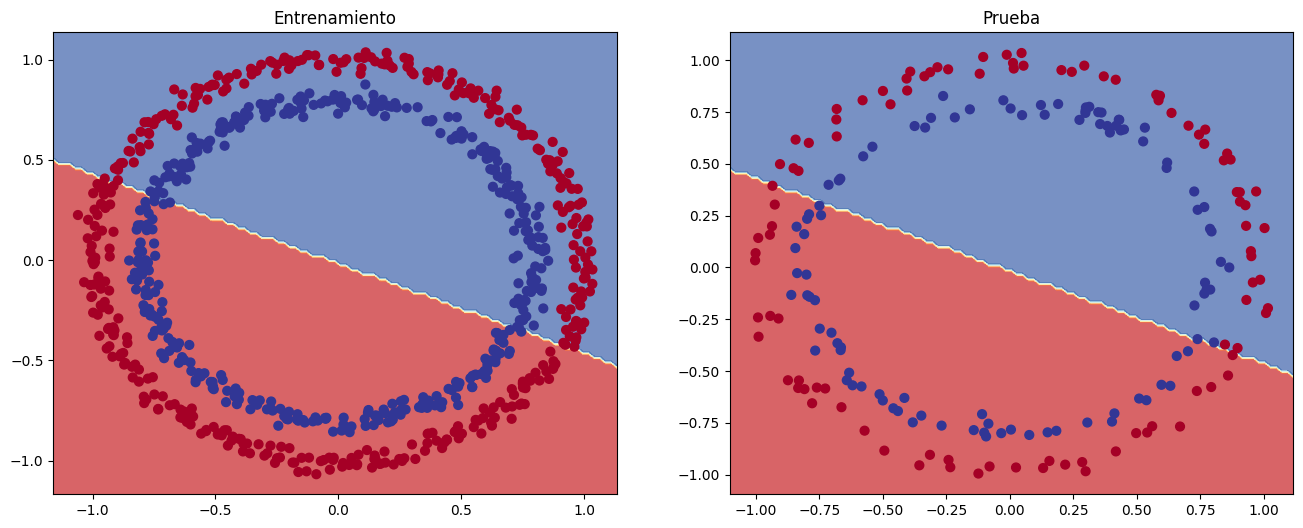

In [28]:
plt.figure(figsize=(16,6))
plt.subplot(1, 2, 1)
plt.title("Entrenamiento")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Prueba") 
plot_decision_boundary(model_1, X_test, y_test)

# Sobre el modelo anterior

El objetivo, por lo que tengo entendido, es mostrar que no necesariamente agregar a lo loco más capas, datos y cambiar las funciones de activación resolverá magicamente nuestro problema, o eso entendí al menos.

La mejora fué horrible, así haya 1.000 iteraciones, podemos seguir jugando cambiando dicho valor y seguirá siendo horrible, es decir: la arquitecuta no es útil, así lo aparente.

Una buena manera de intentar acercarse a una solución es agarrar un set de datos más pequeño, similar a cuando tenemos una gran tabla SQL y, al ser imposible solucionar esta consulta si tenemos en cuenta todos los datos, nos limitamos a un conjunto de N registros que sea de un tamaño razonable y nos permita interpretar los datos correctamente.

In [29]:
# Creamos un modelo lineal entonces, al menos por este lado te lleva el curso, aunque no sé que tan eficiente sea para este caso dado que estoy deduciendo, aunque más a base de suposiciones "lógicas" que conocimiento, que no es por acá.

peso = 0.7
b = 0.3
start = 0
end = 1
step = 0.01

X_regresison = torch.arange(start, end, step).unsqueeze(dim=1)
y_regression = peso * X_regresison + b # Formula de regresión líneal

print(len(X_regresison))
X_regresison[:5], y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [30]:
# Separamos datos de entrenamiento y prueba (los spliteamos)

train_split = int(0.8 * len(X_regresison))
X_train_regression, y_train_regression = X_regresison[:train_split], y_regression[:train_split]
X_test_regression, y_test_regression = X_regresison[train_split:], y_regression[train_split:]

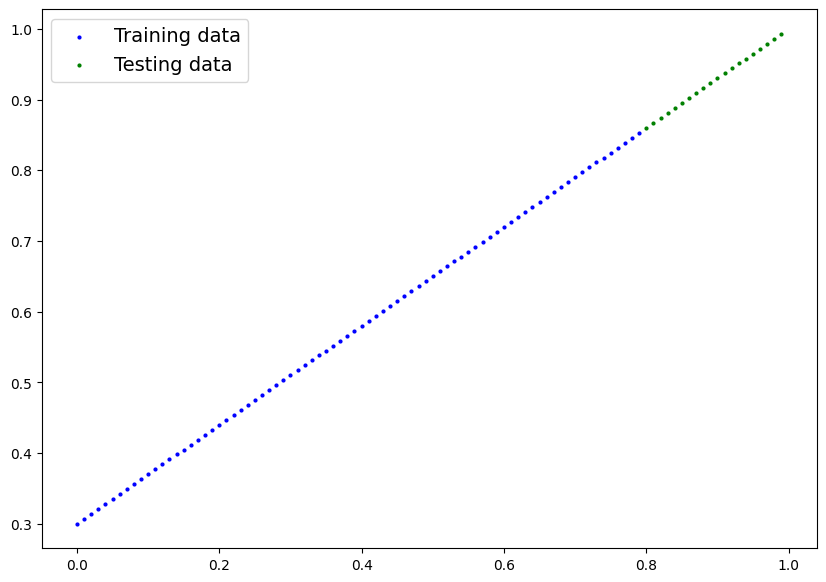

In [31]:
plot_predictions(train_data=X_train_regression,
                 train_labels=y_train_regression,
                 test_data=X_test_regression,
                 test_labels=y_test_regression)

In [32]:
# Analicemos la estructura de nuestro modelo

print(model_1)
# X_train_regression[:10], y_train_regression[:10] # Debemos transformar nuestra información a los tamaños de nuestro model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)


In [33]:
model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [34]:
# Instanciamos la función de optimización y perdida

loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.01)

In [35]:
# Entrenamos el modelo

torch.manual_seed(42)

epocas = 1000

for epoca in range(epocas):
    #  Entrenamiento
    y_pred = model_2(X_train_regression)
    loss = loss_fn(y_pred, y_train_regression)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step() 

    # Prueba

    model_2.eval()
    with torch.inference_mode():
        test_pred = model_2(X_test_regression)
        test_loss = loss_fn(test_pred, y_test_regression)
        
    if epoca % 100 == 0:
        print(f"Epoca: {epoca} Perdida: {loss:.5f} Prueba de perdida: {test_loss:.5f}")

Epoca: 0 Perdida: 0.75986 Prueba de perdida: 0.91103
Epoca: 100 Perdida: 0.02858 Prueba de perdida: 0.00081
Epoca: 200 Perdida: 0.02533 Prueba de perdida: 0.00209
Epoca: 300 Perdida: 0.02137 Prueba de perdida: 0.00305
Epoca: 400 Perdida: 0.01964 Prueba de perdida: 0.00341
Epoca: 500 Perdida: 0.01940 Prueba de perdida: 0.00387
Epoca: 600 Perdida: 0.01903 Prueba de perdida: 0.00379
Epoca: 700 Perdida: 0.01878 Prueba de perdida: 0.00381
Epoca: 800 Perdida: 0.01840 Prueba de perdida: 0.00329
Epoca: 900 Perdida: 0.01798 Prueba de perdida: 0.00360


# Funcionamiento de este modelo

El modelo funciona de maravilla, "aprende" sin problema alguno, este problema planteado es lineal.

El problema en nuestro set de datos de circulos es que el problema si bien clasifica los puntos en azules o rojos estos no estan para nada distribuidos de manera lineal, por eso falla y la red neuronal no es simplemente magia.

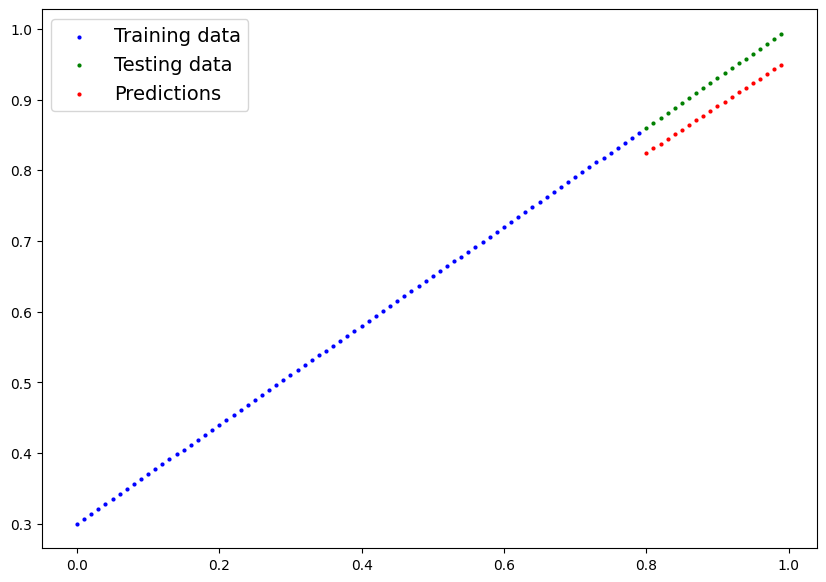

In [36]:
model_2.eval()

with torch.inference_mode():
    y_preds = model_2(X_test_regression)

plot_predictions(train_data=X_train_regression,
                 train_labels=y_train_regression,
                 test_data=X_test_regression,
                 test_labels=y_test_regression,
                 predictions=y_preds)

# Problemas no lineales

Si nuestros problemas no son líneales, ¿con qué criterio encontraremos patrones? ¿Qué lógica existe detras del azar de los hechos? 

Text(0.5, 1.0, 'Make Circles: los datos no se distribuyen de tal manera que puedan ser identificados o separados linealmente.')

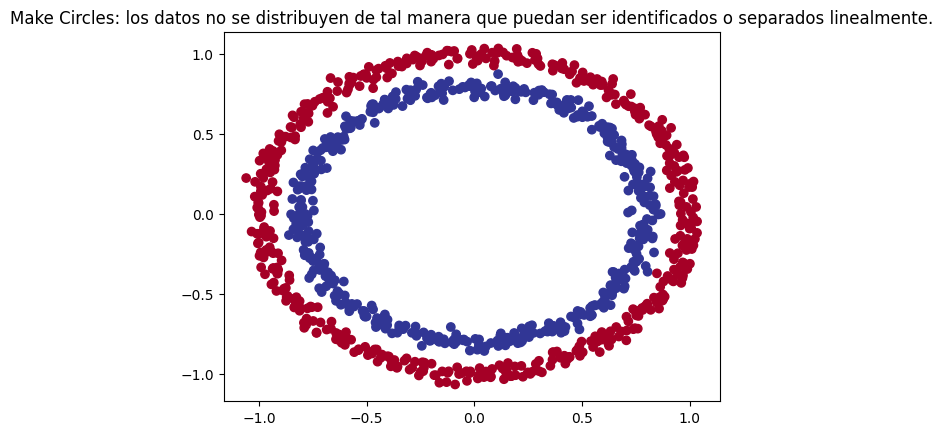

In [37]:
plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c=y,
            cmap=plt.cm.RdYlBu)
plt.title("Make Circles: los datos no se distribuyen de tal manera que puedan ser identificados o separados linealmente.")

In [38]:
X, y = make_circles(n_samples, 
                    noise=0.03,
                    random_state=42)

# Transformamos los datos en tensores

X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# Separamos los datos (splitear)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train[:5], y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

# TensorFlow playground

Para simular una posible arquitectura que resuelva el problema en cuestión podemos utilizar tensorFlow playground, si bien la libreria es otra el fundamento es el mismo:

<center><img src="img/solucion_no_lineal.png"></center>

Dado este ejemplo podrémos realizar el mismo modelo en pyTorch.

In [39]:
class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        self.relu = nn.ReLU()

    def forward(self, x):
        return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3 = CircleModelV2()
model_3

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [40]:
# Perdida y optimización

loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_3.parameters(), lr=0.1)

In [41]:
torch.manual_seed(42)
epocas = 1000

for epoca in range(epocas):
    # 1. Foward pass
    y_logits = model_3(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> prediction probabilities -> prediction labels 

    # 2. Calcular la perdida y aciertos
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)
    
    # 3. Optimizar 

    optimizer.zero_grad()

    # 4. Retropropagación

    loss.backward()

    # 5. Optimizar pasos

    optimizer.step()

    # Prueba
    model_3.eval()
    with torch.inference_mode():
        # 1. Foward pass
        test_logits = model_3(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        # 2. Calcular la perdida y aciertos
        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)

        if epoca % 100 == 0:
            print(f"Epoca: {epoca} | Perdida: {loss:.5f}, Aciertos: {acc:.2f}% | Prueba de perdida: {test_loss:.5f}, Prueba de aciertos: {test_acc:.2f}%")

Epoca: 0 | Perdida: 0.69295, Aciertos: 50.00% | Prueba de perdida: 0.69319, Prueba de aciertos: 50.00%
Epoca: 100 | Perdida: 0.69115, Aciertos: 52.88% | Prueba de perdida: 0.69102, Prueba de aciertos: 52.50%
Epoca: 200 | Perdida: 0.68977, Aciertos: 53.37% | Prueba de perdida: 0.68940, Prueba de aciertos: 55.00%
Epoca: 300 | Perdida: 0.68795, Aciertos: 53.00% | Prueba de perdida: 0.68723, Prueba de aciertos: 56.00%
Epoca: 400 | Perdida: 0.68517, Aciertos: 52.75% | Prueba de perdida: 0.68411, Prueba de aciertos: 56.50%
Epoca: 500 | Perdida: 0.68102, Aciertos: 52.75% | Prueba de perdida: 0.67941, Prueba de aciertos: 56.50%
Epoca: 600 | Perdida: 0.67515, Aciertos: 54.50% | Prueba de perdida: 0.67285, Prueba de aciertos: 56.00%
Epoca: 700 | Perdida: 0.66659, Aciertos: 58.38% | Prueba de perdida: 0.66322, Prueba de aciertos: 59.00%
Epoca: 800 | Perdida: 0.65160, Aciertos: 64.00% | Prueba de perdida: 0.64757, Prueba de aciertos: 67.50%
Epoca: 900 | Perdida: 0.62362, Aciertos: 74.00% | Prueba 

In [42]:
model_3.eval()
with torch.inference_mode():
    y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()

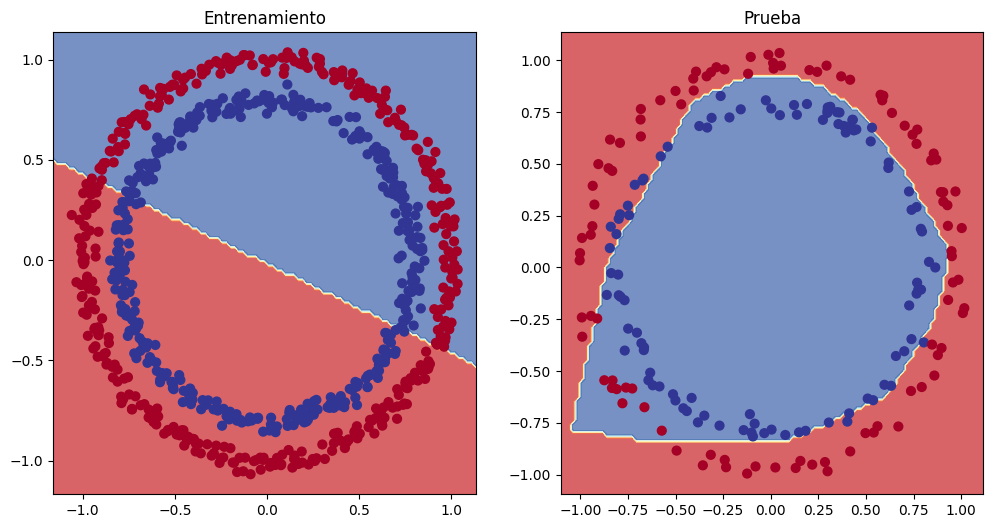

In [43]:
# Gráfiquemos los datos en cuestión, hora de la verdad sobre nuestro modelo creado con tensorflow playgrond:

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Entrenamiento")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Prueba")
plot_decision_boundary(model_3, X_test, y_test)

# Modelo no lineal funcionando 

Tal como vimos anteriormente, nuestro modelo funciono! Así se pueda mejorar, el avancé esta y ya realizamos nuestra primera red neuronal con un resultado razonable.
Las funciones de activación y arquitecturas son infinitas, es imposible saberlas de memoria, por lo que lo mejor es desarrollar un pensamiento lógico.
A continuación realizaré un modelo mejorado que funcionará mejor.

In [44]:
class CircleModelV3(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        # self.layer_4 = nn.Linear(in_features=10, out_features=1)
        # self.layer_5 = nn.Linear(in_features=10, out_features=1)
        # self.layer_6 = nn.Linear(in_features=10, out_features=1)
        self.relu = nn.ReLU()

    def forward(self, x):
        return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_4 = CircleModelV3()
model_4

CircleModelV3(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [45]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_4.parameters(), lr=0.1)

In [46]:
torch.manual_seed(42)
epocas = 1000

for epoca in range(epocas):
    # 1. Foward pass
    y_logits = model_4(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> prediction probabilities -> prediction labels 

    # 2. Calcular la perdida y aciertos
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)
    
    # 3. Optimizar 

    optimizer.zero_grad()

    # 4. Retropropagación

    loss.backward()

    # 5. Optimizar pasos

    optimizer.step()

    # Prueba
    model_4.eval()
    with torch.inference_mode():
        # 1. Foward pass
        test_logits = model_4(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        # 2. Calcular la perdida y aciertos
        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)

        if epoca % 100 == 0:
            print(f"Epoca: {epoca} | Perdida: {loss:.5f}, Aciertos: {acc:.2f}% | Prueba de perdida: {test_loss:.5f}, Prueba de aciertos: {test_acc:.2f}%")

Epoca: 0 | Perdida: 0.69295, Aciertos: 50.00% | Prueba de perdida: 0.69319, Prueba de aciertos: 50.00%
Epoca: 100 | Perdida: 0.69115, Aciertos: 52.88% | Prueba de perdida: 0.69102, Prueba de aciertos: 52.50%
Epoca: 200 | Perdida: 0.68977, Aciertos: 53.37% | Prueba de perdida: 0.68940, Prueba de aciertos: 55.00%
Epoca: 300 | Perdida: 0.68795, Aciertos: 53.00% | Prueba de perdida: 0.68723, Prueba de aciertos: 56.00%
Epoca: 400 | Perdida: 0.68517, Aciertos: 52.75% | Prueba de perdida: 0.68411, Prueba de aciertos: 56.50%
Epoca: 500 | Perdida: 0.68102, Aciertos: 52.75% | Prueba de perdida: 0.67941, Prueba de aciertos: 56.50%
Epoca: 600 | Perdida: 0.67515, Aciertos: 54.50% | Prueba de perdida: 0.67285, Prueba de aciertos: 56.00%
Epoca: 700 | Perdida: 0.66659, Aciertos: 58.38% | Prueba de perdida: 0.66322, Prueba de aciertos: 59.00%
Epoca: 800 | Perdida: 0.65160, Aciertos: 64.00% | Prueba de perdida: 0.64757, Prueba de aciertos: 67.50%
Epoca: 900 | Perdida: 0.62362, Aciertos: 74.00% | Prueba 

In [47]:
model_4.eval()
with torch.inference_mode():
    y_preds = torch.round(torch.sigmoid(model_4(X_test))).squeeze()

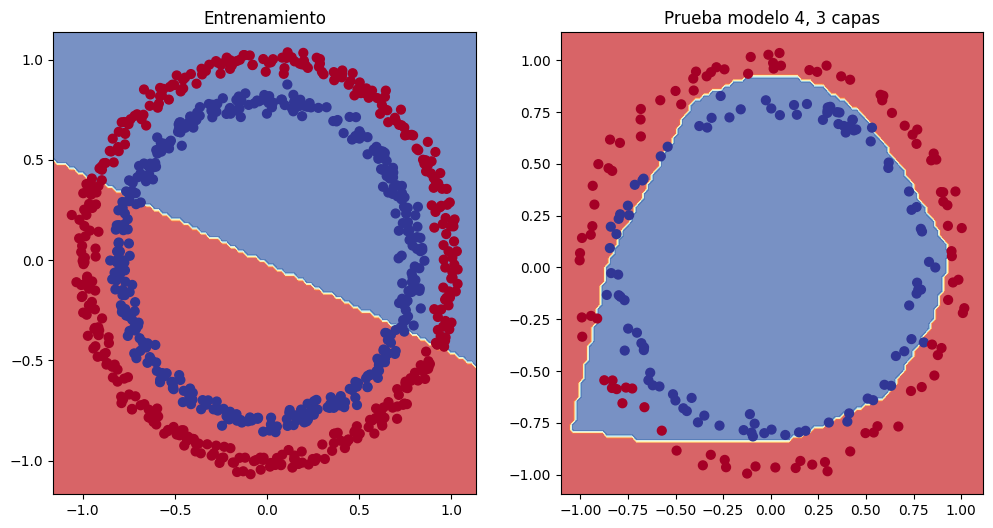

In [48]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Entrenamiento")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Prueba modelo 4, 3 capas")
plot_decision_boundary(model_4, X_test, y_test)

# Funciones de activación

Las funciones de activación de las neuronas son varias, es imposible contemplar todas y tampoco tiene sentido dado que estan explicadas en la documentación oficial de pyTorch, sin embargo a continuación dejaré algunas:
<center><img src="img/funciones_de_activacion.png"></center>

# Clasificación multiclase

La clasicación multiclase tendrá como salida más de dos posibles valores, por ejemplo: comidas (pizza, hambuerguesa, panchos, entre otras).

Utilizaremos como ejemplo el set de datos de make_blobs

tensor([[-8.4134,  6.9352],
        [-5.7665, -6.4312],
        [-6.0421, -6.7661],
        [ 3.9508,  0.6984],
        [ 4.2505, -0.2815]]) tensor([3., 2., 2., 1., 1.])


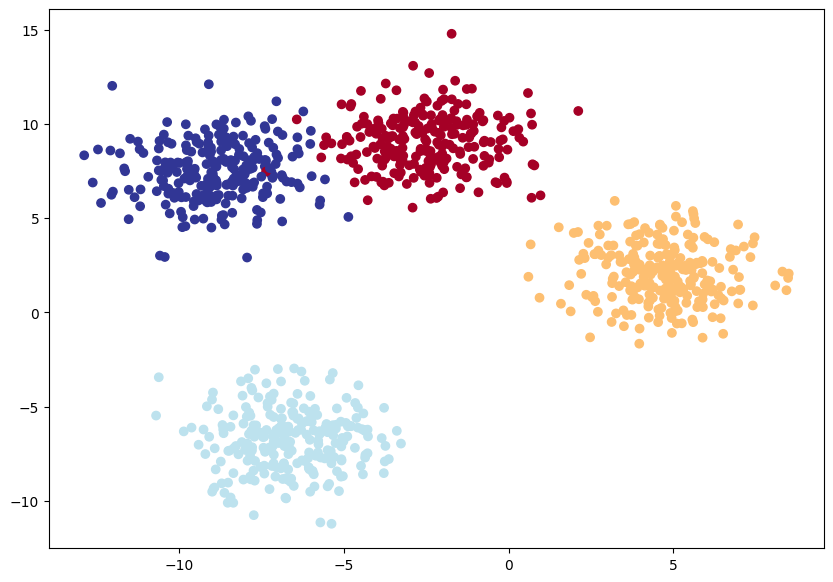

In [68]:
from sklearn.datasets import make_blobs


# Hiperparametros
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1. Create multi-class data
X_blob, y_blob = make_blobs(n_samples=1000,
    n_features=NUM_FEATURES, 
    centers=NUM_CLASSES,
    cluster_std=1.5, 
    random_state=RANDOM_SEED
)

# 2. Convertimos la data a tensores
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.float)
print(X_blob[:5], y_blob[:5])

# 3. Seperamos los datos (spliteamos)
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
    y_blob,
    test_size=0.2,
    random_state=RANDOM_SEED
)

# 4. Graficamos
plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu)

In [76]:
class BlobModel(nn.Module):
    def __init__(self, input_features, output_features, hidden_units=8):
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_features)
        )

    def forward(self, x):
        return self.linear_layer_stack(x)

model_5 = BlobModel(input_features=NUM_FEATURES,
                    output_features=NUM_CLASSES,
                    hidden_units=8)

model_5

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [77]:
# Instaciamos la función de perdida y prueba

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_5.parameters(),
                            lr=0.1)

In [78]:
# Entrenamos nuestro modelo

torch.manual_seed(42)
epocas = 100

for epoca in range(epocas):
    model_5.train()

    # 1. Forward pass
    y_logits = model_5(X_blob_train)
    y_pred = torch.argmax(y_logits, dim=1)

    # 2. Calcular función de pérdida y exactitud
    loss = loss_fn(y_logits, y_blob_train.long())
    acc = accuracy_fn(y_true=y_blob_train, y_pred=y_pred)

    # 3. Optimizador 0 grad
    optimizer.zero_grad()

    # 4. Retropropagación
    loss.backward()

    # 5. Optimizar pasos
    optimizer.step()

    # Testing
    model_5.eval()
    with torch.inference_mode():
        # 1. forward pass
        test_logits = model_5(X_blob_test)
        test_pred = torch.argmax(test_logits, dim=1)

        # 2. Pérdida y exactitud
        test_loss = loss_fn(test_logits, y_blob_test.long())
        test_acc = accuracy_fn(y_true=y_blob_test, y_pred=test_pred)

    if epoca % 10 == 0:
        print(f"Epoca: {epoca} la pérdida es de {loss:.5f} la exactitud de {acc:.2f} "
              f"la prueba de pérdida (test_loss: {test_loss:.5f}) "
              f"y la prueba de exactitud (test_acc: {test_acc:.2f})")


Epoca: 0 la pérdida es de 1.15883 la exactitud de 40.38 la prueba de pérdida (test_loss: 1.07554) y la prueba de exactitud (test_acc: 48.00)
Epoca: 10 la pérdida es de 0.64476 la exactitud de 96.75 la prueba de pérdida (test_loss: 0.66069) y la prueba de exactitud (test_acc: 97.50)
Epoca: 20 la pérdida es de 0.42535 la exactitud de 98.50 la prueba de pérdida (test_loss: 0.43074) y la prueba de exactitud (test_acc: 100.00)
Epoca: 30 la pérdida es de 0.25294 la exactitud de 99.12 la prueba de pérdida (test_loss: 0.24508) y la prueba de exactitud (test_acc: 99.50)
Epoca: 40 la pérdida es de 0.11232 la exactitud de 99.25 la prueba de pérdida (test_loss: 0.10229) y la prueba de exactitud (test_acc: 99.50)
Epoca: 50 la pérdida es de 0.06627 la exactitud de 99.25 la prueba de pérdida (test_loss: 0.05848) y la prueba de exactitud (test_acc: 99.50)
Epoca: 60 la pérdida es de 0.05068 la exactitud de 99.25 la prueba de pérdida (test_loss: 0.04293) y la prueba de exactitud (test_acc: 99.50)
Epoca:

In [79]:
y_logits = model_5(X_blob_test)
y_pred_probs = torch.softmax(y_logits, dim=1)

In [80]:
model_5.eval()

with torch.inference_mode():
    y_logits = model_5(X_blob_test)

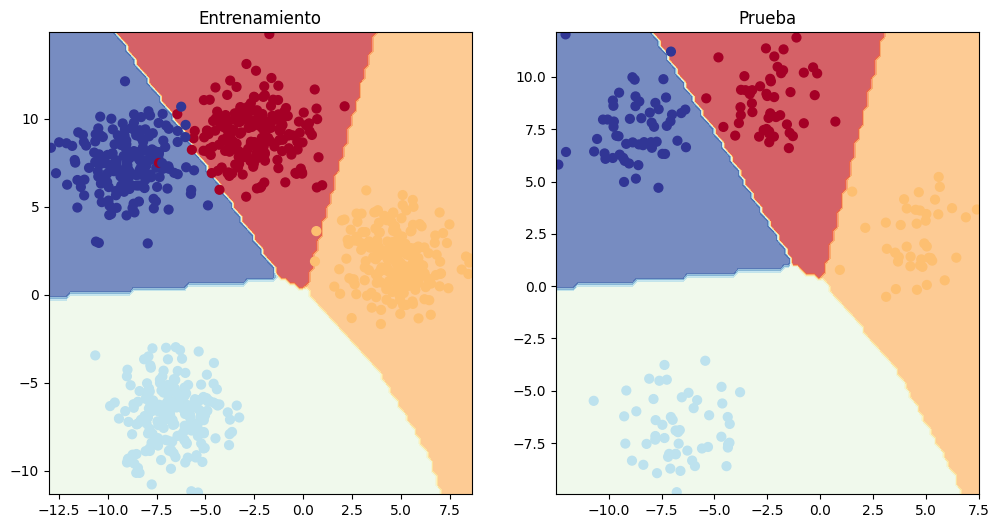

In [81]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Entrenamiento")
plot_decision_boundary(model_5, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Prueba")
plot_decision_boundary(model_5, X_blob_test, y_blob_test)

# Metricas de clasficación

Existen más metricas de clasificación, es bueno sabero y tener una idea del concepto matemático, no vienen al caso en este laboratorio.